# Imports

In [4]:
from utils import *

# Params

In [5]:
def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameters
            'max_steps': 120,
            'num_episodes': 100,
            'num_actions': 7, 
            'start_action': 0, 
            'correct_action': 1,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,
            'plots': False,
            'noise': True,
            'surrogate': False,
            'surrogate_c_interval': 10,
            'surrogate_c_interval_min': 30,
           }

# Noiseless rewards UCB Q-learning

100%|██████████| 100/100 [00:00<00:00, 352.40it/s]


Accuracy: 8.0
Mean episode length: 90.79


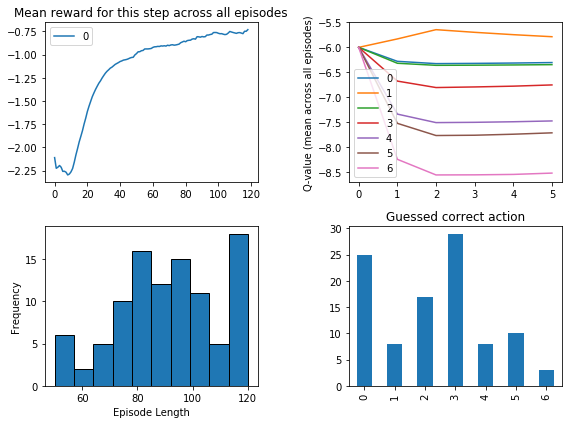

array([-6.304833, -5.786275, -6.346814, -6.753755, -7.476358, -7.715113,
       -8.522974])

In [7]:
params = default_params()
params['noise'] = False
params['plots'] = True

# The Q-value shape make sense - we're trying higher numbers later
# so they converge to -1 slower than e.g. action 0 or 1
plot_mean_q_values(params=params)

# Experiments in the limit

if 
- we always take the random action, epsilon=1.0
- we assume the q-value to always be the reward we got, alpha=1.0

we expect, in the limit max_steps=100000
- the q-values of each action to be equal to its true reward
- the mean reward to be equal to 
`(sum of all rewards per given action) / n_actions = -(1+0+1+2+3+4+5)/7 = 16/7 = 2.29`

100%|██████████| 1/1 [00:00<00:00, 52.12it/s]

Accuracy: 100.0
Mean episode length: 1000.0


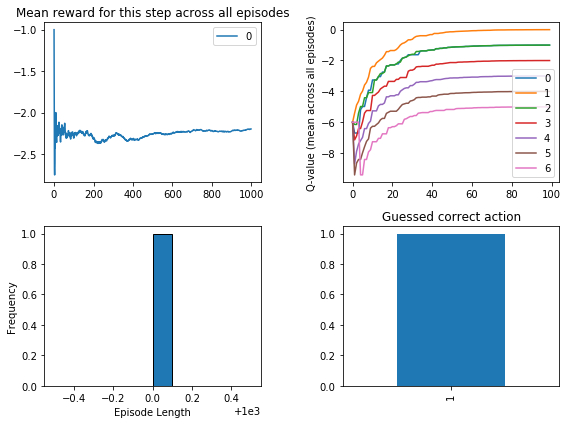

array([-1.0035e+00, -3.5000e-03, -1.0043e+00, -2.0035e+00, -3.0035e+00,
       -4.0035e+00, -5.0048e+00])

In [8]:
params_new ={
    'max_steps': 1000,
    'num_episodes': 1,
    'plots': True, 
    'noise': False,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    'alpha_min': 1.0,
    'convergence_count_start': 1000,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

## Noise

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 36.95it/s]

Accuracy: 0.0
Mean episode length: 1000.0
Last reward processor:
Estimated confusion matrix:


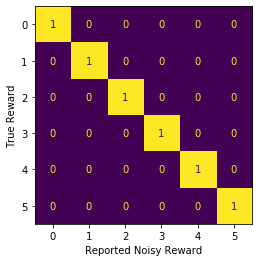

Reward sets:
(0, 0): [-2, -1, -1, -1, -1, -2, 0, -1, 0, -1, -2, -2, -2, -1, -2, 0, -1, -1, 0, -1, -1, -1, -1, -1, -2, -2, -2, 0, -1, -3, 0, 0, -1, -1, 0, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, 0, -2, -1, -1, -1, -2, -1, -1, 0, -1, -1, -1, -2, 0, 0, -2, -1, -2, -1, -1, -3, -1, -1, -2, -1, -1, 0, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -2, -2, -2, 0, -1, -1, -1, -2, -1, 0, -3, -1, -1, -1, -2, -1, -1, -2, 0, 0, -3, -1, -1, -2, 0, -1, -1, -3, -1, -1, -1, -1, -2, -1, -1, 0, -1, -1, 0, -1, -1, -1, -1, 0, -1, -2, 0, -1, -2, 0]
(0, 1): [0, 0, -1, 0, -1, 0, 0, 0, 0, -1, -1, 0, 0, -1, -1, -2, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -2, -2, 0, 0, 0, 0, -1, -1, -2, 0, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, -2, -2, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1, 0, 0, 0, -2, -1, 0, -1, -1, -1, 0, 0, -2, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0

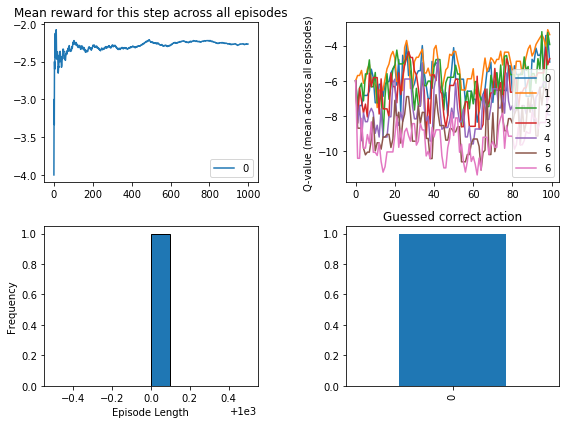

array([-4.938 , -3.3763, -3.938 , -4.7411, -7.938 , -5.7411, -6.938 ])

In [9]:
# When we add noise, we see that the reward converges slower,
# and that the q-values never converge.
params_new = {
    'max_steps': 1000,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    'alpha_min': 1.0,
    'convergence_count_start': 1000,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 10000/10000 [04:10<00:00, 39.87it/s]


Accuracy: 62.67
Mean episode length: 1000.0
Last reward processor:
Estimated confusion matrix:


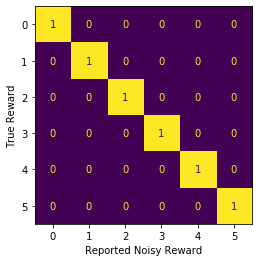

Reward sets:
(0, 0): [-3, 0, -2, -1, -1, -1, -2, -2, -1, 0, -2, -1, -1, -1, -1, -2, 0, 0, -3, 0, 0, -1, 0, -2, -1, -1, -1, -1, -2, -1, -1, -3, -1, 0, -1, -1, 0, -1, -1, -1, -1, -2, -2, 0, -1, -2, -1, -2, -1, -1, -2, -1, 0, -1, -1, 0, -1, 0, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -2, -2, -2, -2, -2, 0, -3, -1, 0, -2, 0, 0, 0, -3, -1, -1, 0, -1, 0, 0, -2, -1, -1, -1, -3, -1, -1, -2, -2, 0, -2, -1, 0, 0, -2, 0, 0, -1, -2, -2, -1, -1, -1, -1, 0, -1, -1, -2, -2, -3, -1, 0, 0, -1, -1, -1, -1, -1, -2, -1, -3, 0, -1, -2, -1, -1]
(0, 1): [-2, 0, -1, 0, 0, 0, 0, -2, 0, -2, -1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -2, -1, 0, 0, 0, -2, 0, 0, -1, 0, -1, 0, 0, 0, 0, -2, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, -2, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, -2, -1, 0, 0, 0, 0, 0, -1, -2, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -2, 0, 0, 0, -1, 0, 0, -2, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, -1, -2, -1, 0, 0, -1

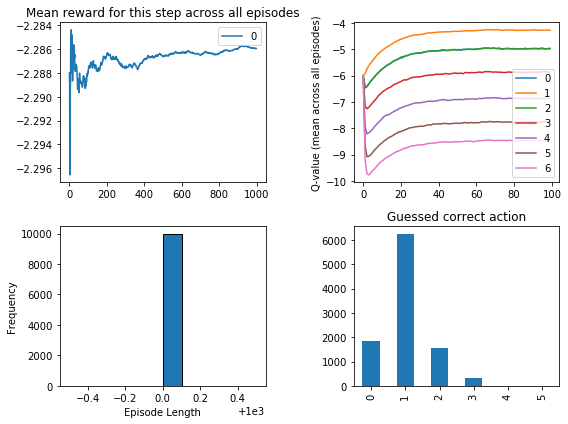

array([-4.96773725, -4.27081438, -4.96821848, -5.86681947, -6.87067266,
       -7.74921199, -8.46778415])

In [13]:
# Averaged out across many episodes, they converge to their expected reward (noise*reward) 
params_new = {
    'max_steps': 1000,
    'num_episodes': 10000,
    'plots': True, 
    'noise': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    'alpha_min': 1.0,
    'convergence_count_start': 1000,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

Results of running 10 000 episodes of 1000 steps with noisy rewards
correc_action=1

`array([-1.1183, -0.4061, -1.1001, -1.9967, -3.0092, -3.9026, -4.6086])`

Expected reward, when the true reward should be 0 i.e. when we pick the correct action

`0.67*0+0.27*-1+0.067*-2 = -0.404`

As one can see, this matches the q-value of the the first action (second elementin our array)

## Surrogate

100%|██████████| 1/1 [00:32<00:00, 32.84s/it]


Accuracy: 100.0
Mean episode length: 1000.0
Last reward processor:
Estimated confusion matrix:


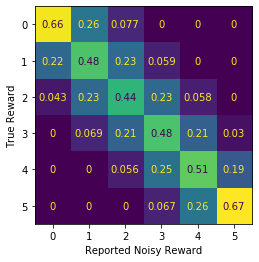

Reward sets:
(0, 0): [0, -1, -2, -1, -1, -1, -1, 0, -1, -3, -3, -2, -1, 0, -2, -1, -1, -1, -1, -2, -1, -2, 0, -1, 0, -1, 0, -1, -1, 0, -1, -2, -1, -2, 0, -2, -2, -1, -1, -1, -3, -1, -1, -1, -2, -1, -2, -1, -1, -1, -1, -1, -1, 0, -1, 0, -2, -2, -2, -2, -3, 0, 0, -2, -1, 0, -1, -1, -1, -1, 0, -3, -2, -2, -2, -2, -1, 0, 0, -2, -1, -1, -1, -2, -2, -2, -2, -1, -2, -1, -2, -1, -1, -2, 0, -3, -1, -1, 0, -1, -2, -1, -3, -1, -1, 0, -2, -1, -2, -2, -1, -1, -1, -2, 0, 0, -1, -1, 0, -1, -1, -1, -2, -2, -2, 0, 0, -1, -1, 0, 0, 0, -2, 0, -1, -1, -3, -1, -1]
(0, 1): [0, -1, 0, -1, 0, -1, 0, -2, 0, 0, 0, 0, 0, 0, -1, -1, 0, -2, -1, -1, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -2, 0, -1, -1, -1, 0, -1, 0, -2, -1, -2, 0, 0, -1, -1, 0, -1, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, -2, 0, 0, 0, 0, -1, 0, -1, 0, -2, -2, -1,

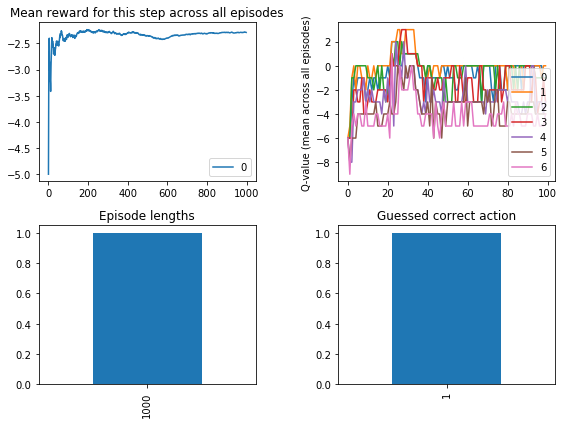

In [16]:
params_new ={
    'max_steps': 1000,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    'alpha_min': 1.0,
    'convergence_count_start': 1000,    
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 1000/1000 [00:32<00:00, 31.05it/s]


Accuracy: 41.9
Mean episode length: 1000.0
Last reward processor:
Estimated confusion matrix:


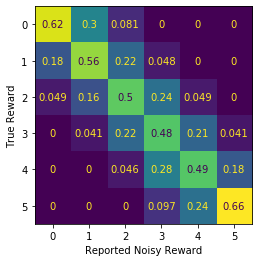

Reward sets:
(0, 0): [-1, -1, 0, 0, -1, 0, 0, 0, -2, -1, 0, -1, -2, -3, 0, -1, -1, -2, -2, -1, -1, -1, -2, 0, -1, -1, 0, -1, -1, -1, -2, -1, -1, -2, -1, -1, -1, -2, -1, -1, 0, 0, -2, -2, -1, -1, -2, -1, 0, -1, -2, -1, -1, -2, -2, -2, -1, -1, -1, -2, -1, -1, -2, -1, -2, -3, 0, -1, 0, -2, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, -1, -2, 0, -1, -1, -2, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -1, -1, -2, -1, -1, -3, -1, -1, -1, 0, -1, -3, 0, -1, -1, -3, -2, -1, -3, -2, 0, -1, -2, -1, -1, -3, -2, 0, -1, 0, -1]
(0, 1): [0, 0, 0, -2, 0, 0, -2, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, 0, -2, -2, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -2, -1, 0, 0, 0, 0, 0, -1, 0, -1, -2, 0, 0, -1, -1, 0, -2, -1, 0, 0, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1, -1, -1, 0, -1, 0, 0, 0, 0, -2, -1, 0, -1, 0, 0, 0, -1, -1, -1, 0, 0, 0, -2, 0, 0, 0, -1, -1, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, -2, -2, 0, -1, 0, 0, -2, -1, 0]
(0, 2): [-2, -1, -1, 0, 0, -3, -1, -1, -2, 0, -2, -2,

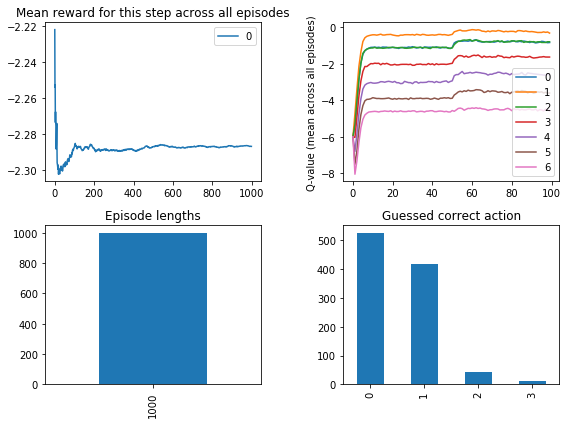

In [10]:
# increasing the surrogate interval 
# and the number of max steps
# also makes the q values converge on their
# true reward
# Unlike in the noisy case, the q-value is closer to the 
# actual true reward, i.e. the q-value for the correct
# action is close to 0

#TODO: sometime the surrogate q-values explode, 
# even when averaged out
#TODO: why is the guessed correct action mostly 0

params_new = {
    'max_steps': 1000,
    'num_episodes': 1000,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    'alpha_min': 1.0,
    'convergence_count_start': 1000,
    'surrogate_c_interval': 100,
    'surrogate_c_interval_min': 500,    
    }
params = default_params() | params_new
plot_mean_q_values(params = params)